In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('/content/Insurance.csv')
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,95051,Female,24,1,10.0,1,< 1 Year,No,18340.0,152.0,223
1,154370,Female,62,1,33.0,1,1-2 Year,No,22481.0,154.0,33
2,131752,Female,25,1,8.0,1,< 1 Year,No,47676.0,152.0,30
3,28904,Male,25,1,27.0,1,< 1 Year,No,33230.0,152.0,278
4,433421,Male,26,1,21.0,1,< 1 Year,No,22364.0,152.0,57


In [ ]:
X = data.drop(["id","Driving_License"],axis=1,inplace=False)
y = data['Driving_License']
X

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Female,24,10.0,1,< 1 Year,No,18340.0,152.0,223
1,Female,62,33.0,1,1-2 Year,No,22481.0,154.0,33
2,Female,25,8.0,1,< 1 Year,No,47676.0,152.0,30
3,Male,25,27.0,1,< 1 Year,No,33230.0,152.0,278
4,Male,26,21.0,1,< 1 Year,No,22364.0,152.0,57
...,...,...,...,...,...,...,...,...,...
19995,Male,36,14.0,0,1-2 Year,Yes,22694.0,124.0,145
19996,Male,54,28.0,0,1-2 Year,Yes,43771.0,124.0,281
19997,Male,41,3.0,0,1-2 Year,Yes,26899.0,124.0,149
19998,Male,54,28.0,0,1-2 Year,Yes,47809.0,124.0,278


In [ ]:
X = data.drop(["id","Driving_License"],axis=1,inplace=False)
y = data['Driving_License']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])
X['Vehicle_Age'] = le.fit_transform(X['Vehicle_Age'])
X['Vehicle_Damage'] = le.fit_transform(X['Vehicle_Damage'])

print(X.head())

   Gender  Age  Region_Code  Previously_Insured  Vehicle_Age  Vehicle_Damage  \
0       0   24         10.0                   1            1               0   
1       0   62         33.0                   1            0               0   
2       0   25          8.0                   1            1               0   
3       1   25         27.0                   1            1               0   
4       1   26         21.0                   1            1               0   

   Annual_Premium  Policy_Sales_Channel  Vintage  
0         18340.0                 152.0      223  
1         22481.0                 154.0       33  
2         47676.0                 152.0       30  
3         33230.0                 152.0      278  
4         22364.0                 152.0       57  


In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
5894,1,43,45.0,0,0,1,32357.0,154.0,99
3728,1,73,28.0,0,2,1,37994.0,26.0,250
8958,0,24,47.0,0,1,1,33243.0,152.0,55
7671,1,29,28.0,0,0,1,49418.0,163.0,274
5999,1,43,41.0,0,0,1,30373.0,124.0,194


In [ ]:
# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Logistic Regression without regularization
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

In [ ]:
# Logistic Regression with L2 regularization (default in LogisticRegression)
lr_l2_model = LogisticRegression(penalty='l2', random_state=42)
lr_l2_model.fit(X_train, y_train)
y_pred_lr_l2 = lr_l2_model.predict(X_test)
y_prob_lr_l2 = lr_l2_model.predict_proba(X_test)[:, 1]

In [ ]:
#evaluating the model
def evaluate_model(y_true, y_pred, y_prob):
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  roc_auc = roc_auc_score(y_true, y_prob)
  return accuracy, precision, recall, f1, roc_auc

In [ ]:
# Evaluating Logistic Regression without regularization
accuracy_lr, precision_lr, recall_lr, f1_lr, roc_auc_lr = evaluate_model(y_test, y_pred_lr, y_prob_lr)

In [ ]:
# Evaluating Logistic Regression with L2 regularization
accuracy_lr_l2, precision_lr_l2, recall_lr_l2, f1_lr_l2, roc_auc_lr_l2 = evaluate_model(y_test, y_pred_lr_l2, y_prob_lr_l2)

In [ ]:
# Print the results
print("Logistic Regression without regularization:")
print(f"Accuracy: {accuracy_lr:.4f}, Precision: {precision_lr:.4f}, Recall: {recall_lr:.4f}, F1-score: {f1_lr:.4f}, ROC-AUC: {roc_auc_lr:.4f}")

print("\nLogistic Regression with L2 regularization:")
print(f"Accuracy: {accuracy_lr_l2:.4f}, Precision: {precision_lr_l2:.4f}, Recall: {recall_lr_l2:.4f}, F1-score: {f1_lr_l2:.4f}, ROC-AUC: {roc_auc_lr_l2:.4f}")


Logistic Regression without regularization:
Accuracy: 0.9962, Precision: 0.9962, Recall: 1.0000, F1-score: 0.9981, ROC-AUC: 0.8951

Logistic Regression with L2 regularization:
Accuracy: 0.9962, Precision: 0.9962, Recall: 1.0000, F1-score: 0.9981, ROC-AUC: 0.8951


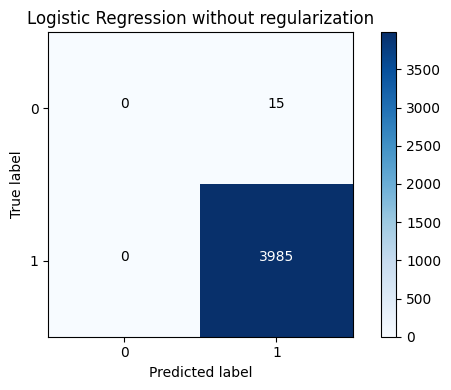

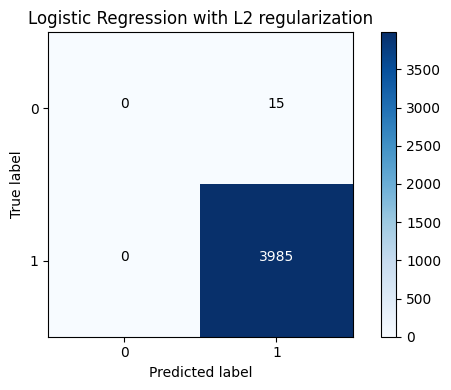

In [ ]:
# Ploting confusion matrices
def plot_confusion_matrix(y_true, y_pred, title):
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(6, 4))
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(2)
  plt.xticks(tick_marks, ['0', '1'])
  plt.yticks(tick_marks, ['0', '1'])
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  thresh = cm.max() / 2.
  for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.show()

plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression without regularization")
plot_confusion_matrix(y_test, y_pred_lr_l2, "Logistic Regression with L2 regularization")

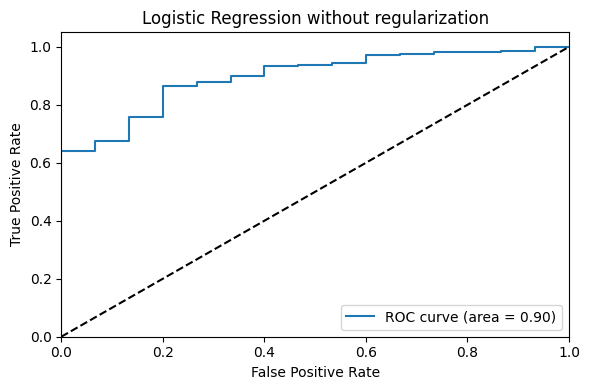

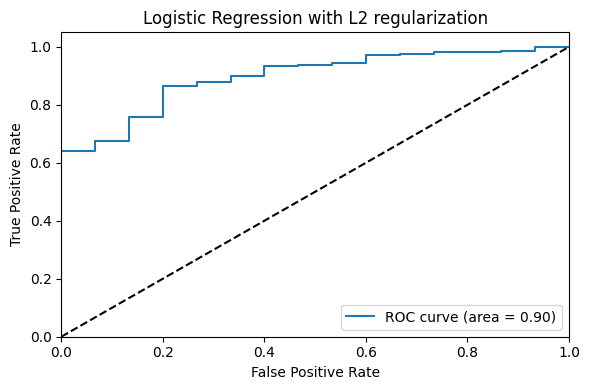

In [ ]:
# Ploting ROC curves
def plot_roc_curve(y_true, y_prob, title):
  fpr, tpr, thresholds = roc_curve(y_true, y_prob)
  plt.figure(figsize=(6, 4))
  plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_true, y_prob))
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(title)
  plt.legend(loc="lower right")
  plt.tight_layout()
  plt.show()

plot_roc_curve(y_test, y_prob_lr, "Logistic Regression without regularization")
plot_roc_curve(y_test, y_prob_lr_l2, "Logistic Regression with L2 regularization")

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Best Hyperparameters:", best_params)
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")

Best Hyperparameters: {'C': 0.001, 'penalty': 'l2'}
Accuracy: 0.9962, Precision: 0.9962, Recall: 1.0000, F1-score: 0.9981, ROC-AUC: 0.8853


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us